# Домашнее задание №2

Задание присылать на обе почты почты aleksartamonov@gmail.com dashkov.alexander.om@gmail.com в виде ссылки на colab

В теме письма указать **CV_HSE_2021 HW2 <Фамилия Имя>**

soft deadline: 14.03.2021T23:59:00+0300

hard deadline: 21.03.2021T23:59:00+0300

In [ ]:
import cv2
import os
import matplotlib.pylab as plt
import numpy as np 
import ipywidgets as widgets
from collections import defaultdict
from itertools import permutations
from typing import Tuple, List, NoReturn
from scipy import fftpack
from itertools import combinations, combinations_with_replacement
from typing import Tuple
from copy import deepcopy
from ipywidgets import interact
from IPython.display import display
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
lena = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena.jpg")
lena_diagonal = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena_diagonal.jpg')

Mounted at /content/drive


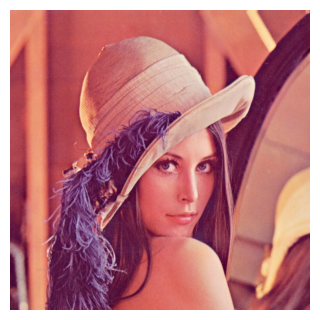

In [ ]:
%matplotlib inline
plt.style.use('default')

def show(img, size=3):
    plt.figure(figsize=(size,size))
    ax = plt.axes([0,0,1,1], frameon=False)
    ax.set_axis_off()
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
show(lena)

In [ ]:
def print_collage(images: List, size=(200, 200)) -> List[np.uint8]:
    resize = lambda image: cv2.resize(image, size)
    images = [resize(image) for image in images]
    collage = np.hstack(images)
    cv2_imshow(collage)


def set_kernel(size: Tuple) -> List[np.uint8]:
    return np.ones(size).astype(np.uint8)

**1. (6 баллов)** С помощью [виджетов](http://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) создайте 2 слайдера с настройками параметров гамма-коррекции. Отобразите **lena**, ее гамма-преобразование и график в диапозоне от [0;1], так, чтобы параметры слайдера соответствовали параметрам гамма-коррекции. 

In [168]:
def plot(c, gamma):
    plt.figure(figsize=(5.7,4))
    plt.title('y = c * x^gamma')
    X = np.linspace(0, 1, 50)
    y = [(c * (x ** gamma)) for x in X]
    plt.xlabel('x')
    plt.ylabel('y')
    plt.plot(X, y, c="black")
    plt.show()

def GammaCorrection(c, gamma):
    cv2_imshow(c * np.power(lena, gamma))
    plot(c, gamma)
    return 

c=widgets.FloatSlider(min=0, max=2, step=0.1)
gamma=widgets.FloatSlider(min=0, max=5, step=0.1)

interact(GammaCorrection,c=c, gamma=gamma)


interactive(children=(FloatSlider(value=0.0, description='c', max=2.0), FloatSlider(value=0.0, description='ga…

<function __main__.GammaCorrection>

**2. (5 баллов)** Загрузите изображение $lena.jpg$. Переведите изображение в градации серого. Примените к серому изображению операцию линейного растяжения диапазона яркостей ($normalize$) и эквализации гистограммы ($equalizeHist$). Постройте разность полученных результатов. Состыкуйте в одно изображение в градациях серого результат линейного растяжения, эквализации и их разности.

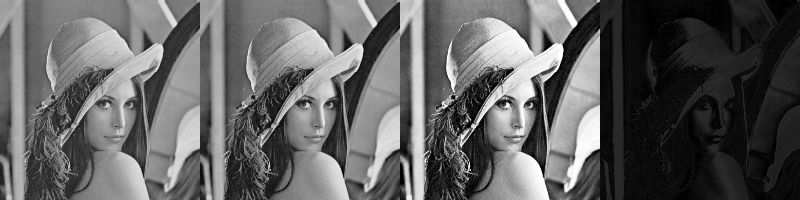

In [ ]:
lena_gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)
lena_normalized = cv2.normalize(lena_gray, None, alpha=0, beta=256, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
lena_equalize = cv2.equalizeHist(lena_gray)
lena_diff = cv2.absdiff(lena_normalized.astype(np.float32), lena_equalize.astype(np.float32))
print_collage([lena_gray, lena_normalized, lena_equalize, lena_diff])

**3. (5 баллов)** Реализуйте функцию добавления шума «соль и перец» для одноканального изображения. Входные параметры: $src$ – исходная одноканальная матрица $Mat$, $p$ – вероятность замещения исходных значений на $0$, $q$ – вероятность замещения исходных значений на $255$. Загрузите изображение $lena.jpg$, выделите каналы изображения в отдельные матрицы ($split$), добавьте шум «соль и перец» в каждый канал при помощи реализованной Вами функции с параметрами

1. $p=q=0.05$
2. $p=q=0.1$
3. $p=q=0.15$

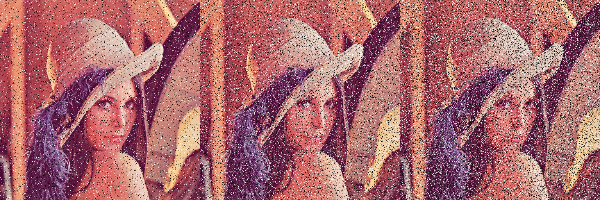

In [ ]:
def salt_pepper(channel, param):
    channel[channel == 0] = param
    return channel

def main(p: int, q: int, image=lena) -> np.ndarray:
    channel1, channel2, channel3 = cv2.split(lena)
    salt_mask = np.random.binomial(1, 1 - p, channel1.shape)
    pepper_mask = np.random.binomial(1, 1 - q, channel1.shape)

    p, q = 255, 0
    put_mask = lambda channel, mask: channel * mask 

    salted_1, salted_2, salted_3 = put_mask(channel1, salt_mask), put_mask(channel2, salt_mask), put_mask(channel3, salt_mask)
    salted_1, salted_2, salted_3 = salt_pepper(salted_1, p), salt_pepper(salted_2, p), salt_pepper(salted_3, p)

    peppered_1, peppered_2, peppered_3 = put_mask(salted_1, pepper_mask), put_mask(salted_2, pepper_mask), put_mask(salted_3, pepper_mask)
    peppered_1, peppered_2, peppered_3 = salt_pepper(peppered_1, q), salt_pepper(peppered_2, q), salt_pepper(peppered_3, q)

    return np.array(cv2.merge([peppered_1, peppered_2, peppered_3])).astype(np.uint8)

salted_lenas = [main(p=0.05, q=0.05), main(p=0.1, q=0.1), main(p=0.15, q=0.15)]
print_collage(salted_lenas)

**4. (5 баллов)** Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$. Тот, у кого по результатам проверки будет наименьшее значение MSE среди всех студентов для этой задачи, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)

mse: 920.5989723205566


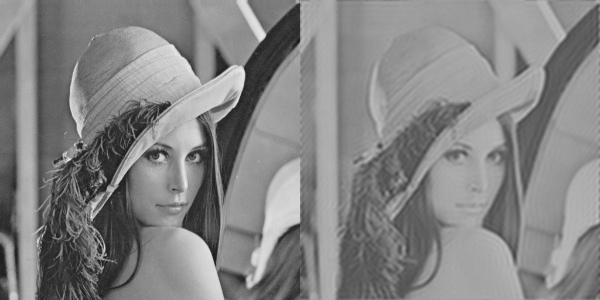

In [ ]:
GrayDiagonalLena = np.float32(cv2.cvtColor(np.array(lena_diagonal), cv2.COLOR_BGR2GRAY))
# fourier
lena_fft = fftpack.fft2(GrayDiagonalLena)
keep_fraction = 0.1
lena_fft2 = deepcopy(lena_fft) 
r, c = lena_fft2.shape
lena_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
lena_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0

# inverse fourier
NoDiagonalLena = fftpack.ifft2(lena_fft2).real

# mse
NoDiagonalLena = np.float32(cv2.cvtColor(np.array(NoDiagonalLena), cv2.COLOR_GRAY2BGR))
LenaGray = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena_gray_512.tif")

print(f'mse: {((NoDiagonalLena.astype(int) - LenaGray.astype(int)) ** 2).mean()}')
print_collage([LenaGray, NoDiagonalLena], size=(300, 300))

**5. (5 баллов)** Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

mse:137.07026163736978


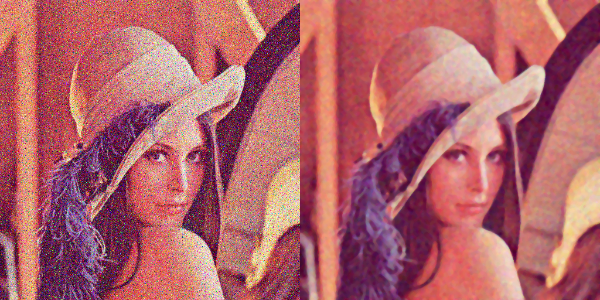

In [ ]:
LenaNoise = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena_color_512-noise.tif")
LenaColor = cv2.imread('/content/drive/MyDrive/Colab Notebooks/CV/hw2/lena_color_512.tif')


size = 5
blur_func = lambda channel1, channel2, channel3: (cv2.medianBlur(channel1, size), 
                                                        cv2.medianBlur(channel2, size), 
                                                        cv2.medianBlur(channel3, size))

def main(n: int) -> List[np.uint8]:
    channel1, channel2, channel3 = cv2.split(LenaNoise)
    for i in range(n):
        channel1, channel2, channel3 = blur_func(channel1, channel2, channel3)
    return [channel1, channel2, channel3]


LenaBlur = cv2.merge(main(3))
print(f'mse:{((LenaColor.astype(int) - LenaBlur.astype(int))** 2).mean()}')
print_collage([LenaNoise, LenaBlur], size=(300, 300))

**6. (5 баллов)** Выделите в изображении $table.jpg$ границы таблицы с использованием морфологических операций. Результатом обработки должно быть изображение, в котором удален весь текст и оставлены только границы таблицы

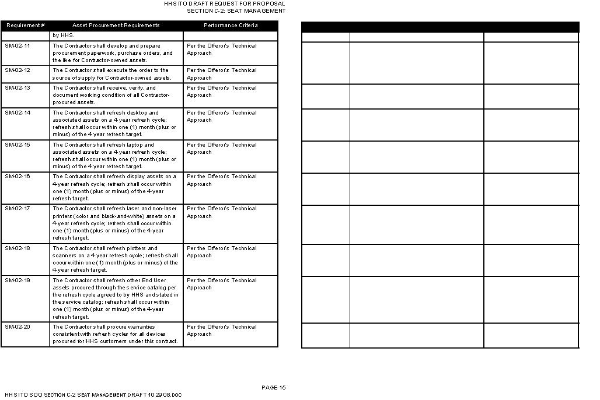

In [ ]:
table = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/table.jpg") 
gray_table = cv2.cvtColor(table, cv2.COLOR_BGR2GRAY)

inversed_table = cv2.threshold(table[:, :, 0], 127, 255, cv2.THRESH_BINARY_INV)[1]
closing =  cv2.morphologyEx(inversed_table, cv2.MORPH_CLOSE, set_kernel((2, 2)))
closing_horizontal =  cv2.morphologyEx(closing, cv2.MORPH_OPEN, set_kernel((16, 1)))
closing_vertical =  cv2.morphologyEx(closing, cv2.MORPH_OPEN, set_kernel((2, 14)))

empty_table = cv2.bitwise_not(closing_horizontal + closing_vertical)
print_collage([gray_table, empty_table], size=(300, 400))

**7. (5 баллов)** Отделите монеты от фона на изображении $coins\_1.jpg$, отсортируйте монеты по убыванию размера. Сгенерируйте результирующее изображение с цветной разметкой областей, соответствующих монетам на исходном изображении: на черном фоне должны быть выделены разными цветами области, соответствующие монетам. В центре каждой выделенной области разместите порядковый номер монеты в соответствии с сортировкой монет по размеру (в центре области, соответствующей самой большой монете, должно стоять число 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


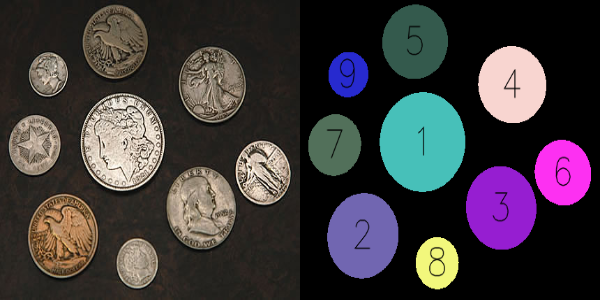

In [ ]:
coins_1 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/coins_1.jpg")
coins_gray = cv2.cvtColor(coins_1, cv2.COLOR_BGR2GRAY)
coins_gray = cv2.GaussianBlur(coins_gray, (5, 5), 0)


def put_number(output):
    f2 = lambda arr, i: tuple(np.array(circles[i][0], dtype=int) + [-15,15])
    f1 = lambda arr, i, tpl: (cv2.putText(arr, str(i+1), tpl, 
                                          cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), lineType=cv2.LINE_AA))
    
    tpls_outputs = [f2(output, i) for i in range(n)]
    [f1(output, i, tpls_outputs[i]) for i in range(n)]


# detact coins
output = np.zeros_like(coins_1, dtype = 'uint8')
ret, thresh = cv2.threshold(coins_gray, 50, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
circles = np.array([cv2.fitEllipse(cnt) for cnt in contours if len(cnt) > 50])
indeces = np.argsort(list(map(lambda x: np.product(x), circles[:, 1])))[::-1]
circles = circles[indeces]


# put colors
n = len(circles)
for i in range(n):
    color = tuple(map(int, np.random.randint(0, 255, 3)))  
    cv2.ellipse(output, tuple(circles[i]), color, -1)


coins = cv2.addWeighted(coins_1, 0.3, output, 0.7, 0)
put_number(output)
print_collage([coins_1, output], size=(300, 300))

**8. (5 баллов)** Отделите монеты от текста на изображении $coins\_2.jpg.$ Сгенерируйте по входному изображению два изображения: на одном должны остаться только монеты, весь текст должен быть удален; на втором изображении должен остаться только текст, все монеты должны быть удалены.

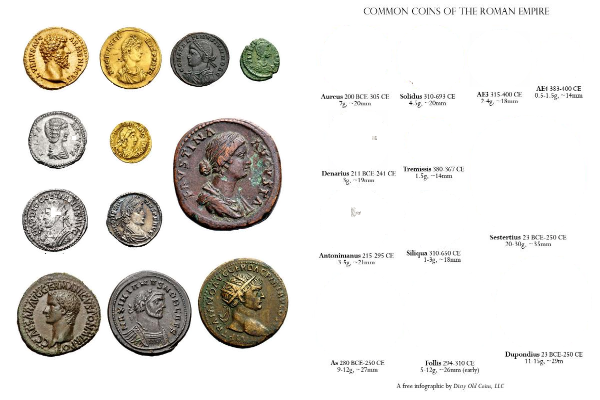

In [ ]:
coins_2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/CV/hw2/coins_2.jpg")
gray_coins = cv2.cvtColor(coins_2, cv2.COLOR_BGR2GRAY)
thresh = (gray_coins<230).astype(np.uint8)

opening =  cv2.morphologyEx(thresh, cv2.MORPH_OPEN, set_kernel((5, 5)))
closing =  cv2.morphologyEx(opening , cv2.MORPH_CLOSE, set_kernel((15, 15)))
dilation = cv2.dilate(closing, set_kernel((10, 10)), 0)

def coins_image(param: int) -> List[np.uint8]:
    image = np.zeros_like(coins_2, dtype=np.uint8)
    image[:, :] = deepcopy(coins_2)
    image[:, :][dilation == param] = 255
    return image

print_collage([coins_image(0), coins_image(1)], size=(300, 400))

### Сравнение глобальных признаков 

Для задач 9 и 10 надо реализовать общую функцию, которая принимет на вход:

* список дескрипторов (**id**, и сам дескриптор) 
* количество максимально похожих для вывода **n**
* функцию сранения дескрипторов

и отдает **n** пар **id** максимально похожих изображений.

**9. (9 баллов)** Посмотрите на изображения в папке *Coral*. Посчитайте гистограммы изображений.  В этом задании надо попробовать:
* различные цветовые пространства (RGB, HSV, CIELab)
* различные способы разбиения на бины (разное количество для каждой характеристики)
* различные метрики сравнения $L_2$, $\chi^2$, пересечение гистограм

В итоге нужно сделать мини отчет по тому, какой метод раотает лучше. И в конце выведите на экран 20 пар изображений с максимально похожими гистограммами, которые получаются этим методом.

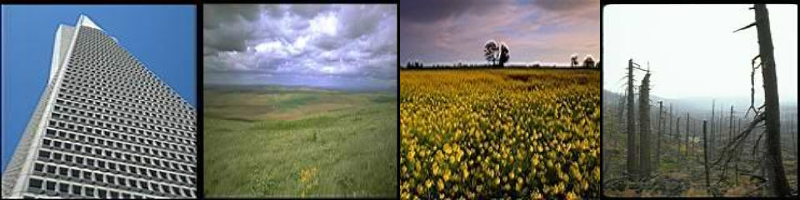

In [ ]:
# DATA LOADING 
coral_path = '/content/drive/MyDrive/Colab Notebooks/CV/hw2/datasets/Corel'

def data_gather(path: str) -> List[str]:
    items_small = []
    items_large = []
    for dirpath, subdirs, files in os.walk(path):
        for name in files:
            item = os.path.join(dirpath, name)
            if cv2.imread(item).shape == (85, 128, 3):
                items_small.append(cv2.imread(item))
            else:
                items_large.append(cv2.imread(item))
    return items_small, items_large
    
items_small, items_large = data_gather(coral_path)
test_images = ([items_large[0], items_large[10], items_large[20], items_large[40]])
print_collage(test_images)

In [ ]:
class Research:
    def __init__(self, image_1, image_2, n_bins, color_space, metric):
        ''' PARAMETERS
        self.color_space:  BGR, HSE, LAB
        self.metric: Chi-Square, Correlation
        '''
        self.image_1 = np.array(image_1).astype(np.uint8)
        self.image_2 = np.array(image_2).astype(np.uint8)
        self.n_bins = n_bins
        self.color_space = color_space
        self.metric = metric
        self.ranges = [0, 256, 0, 256, 0, 256]
        self.channels = np.arange(3)


    def set_color_space(self) -> NoReturn:
        if self.color_space == 'HSV':
            self.image_1 = cv2.cvtColor(self.image_1, cv2.COLOR_BGR2HSV)
            self.image_2 = cv2.cvtColor(self.image_2, cv2.COLOR_BGR2HSV)
            self.ranges = [0, 180, 0, 256]
            self.channels = np.arange(2)

        elif self.color_space == 'LAB':
            self.image_1 = cv2.cvtColor(self.image_1, cv2.COLOR_BGR2LAB)
            self.image_2 = cv2.cvtColor(self.image_2, cv2.COLOR_BGR2LAB)
            self.ranges =  [0, 100, -86.185, 98.254, -107.863, 94.482]


    def distance(self, hist_img1, hist_img2) -> List:
        if self.metric == 'Correlation':
            return cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CORREL)

        elif self.metric == 'Chi-Square':
            return cv2.compareHist(hist_img1, hist_img2, cv2.HISTCMP_CHISQR)


    def calculate_histogram(self):
        hist_img1 = cv2.calcHist([self.image_1], self.channels, None, self.n_bins, self.ranges)
        hist_img1 = cv2.normalize(hist_img1, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

        hist_img2 = cv2.calcHist([self.image_2], self.channels, None, self.n_bins, self.ranges)
        hist_img2 = cv2.normalize(hist_img2, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

        return self.distance(hist_img1, hist_img2)

    @property
    def main(self):
        self.set_color_space()
        distance = self.calculate_histogram
        return distance


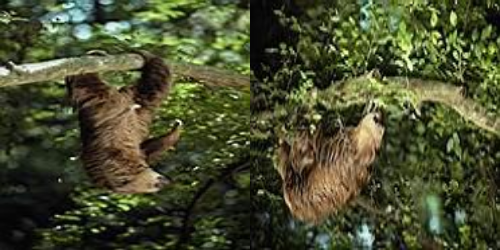

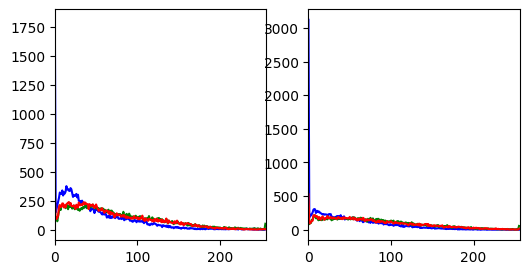

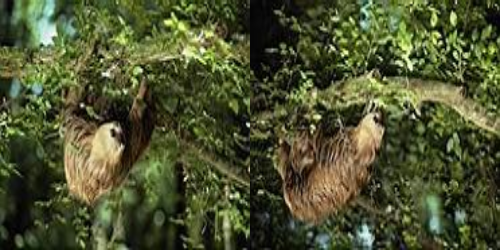

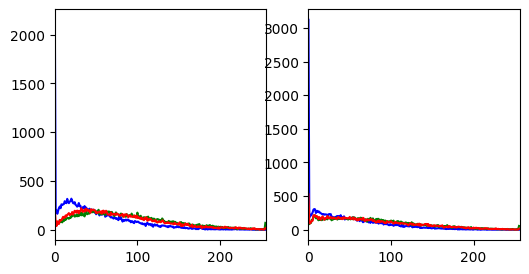

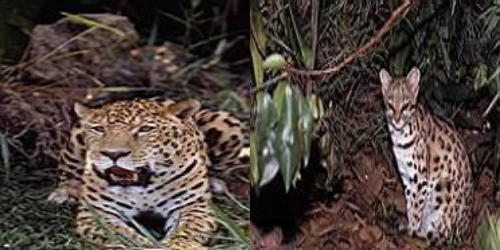

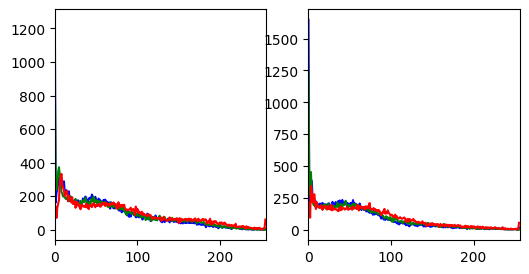

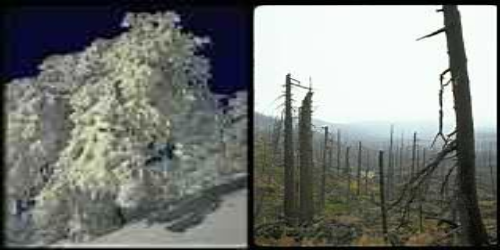

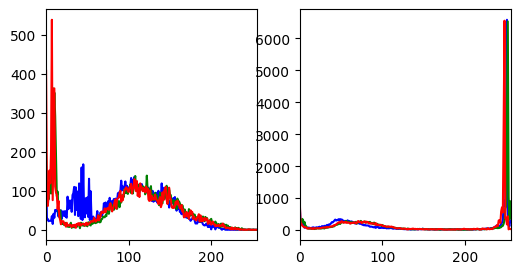

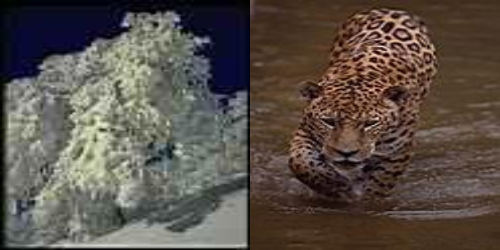

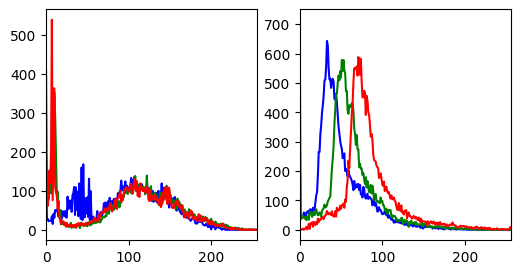

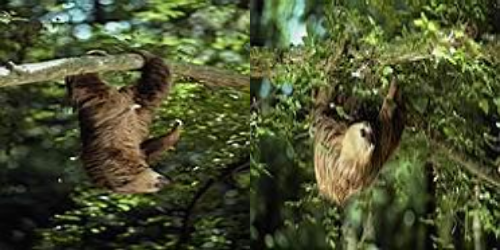

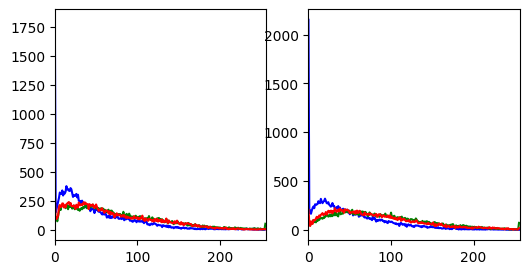

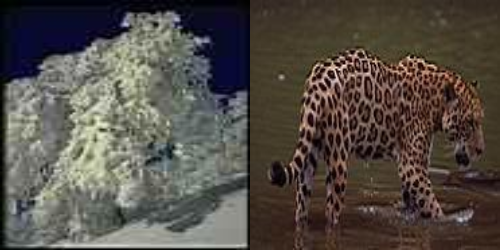

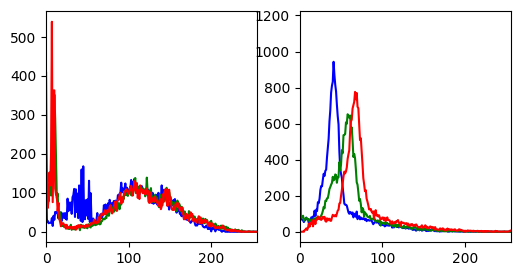

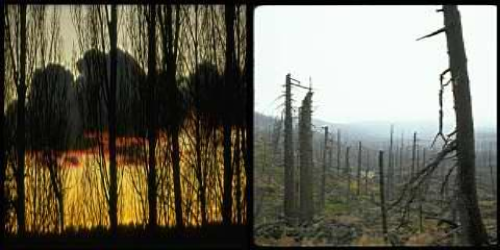

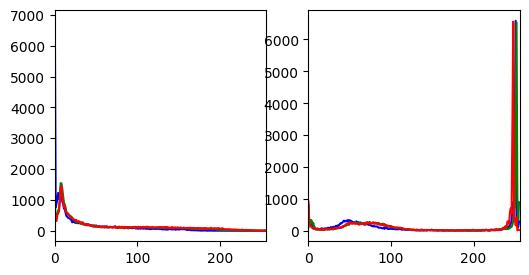

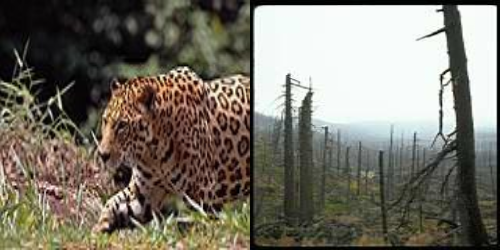

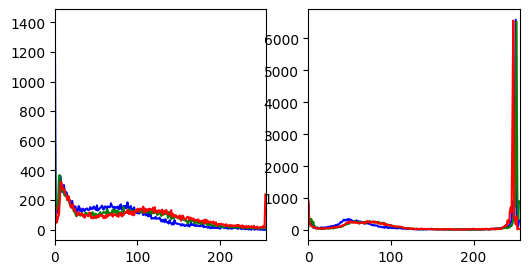

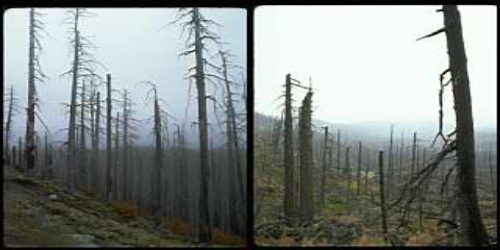

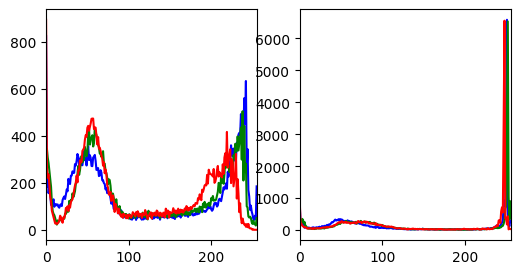

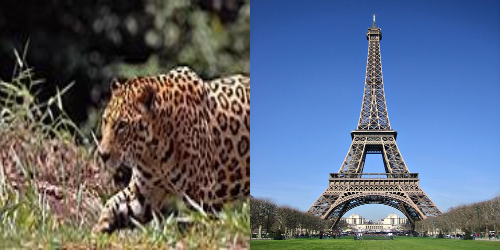

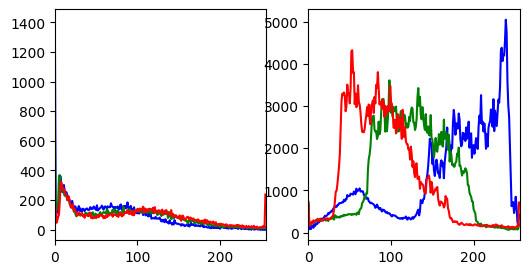

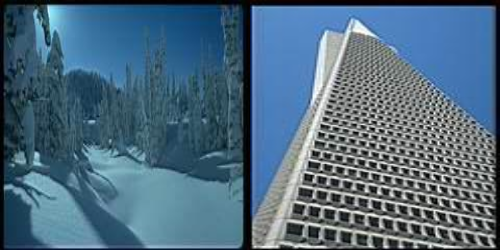

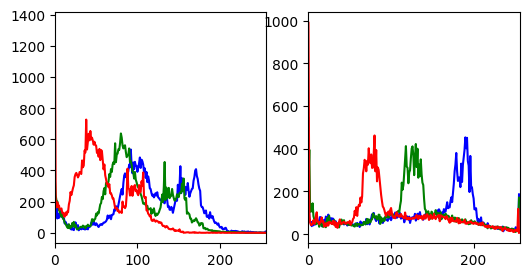

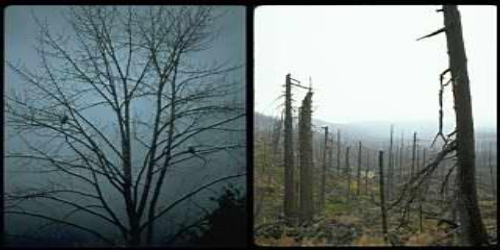

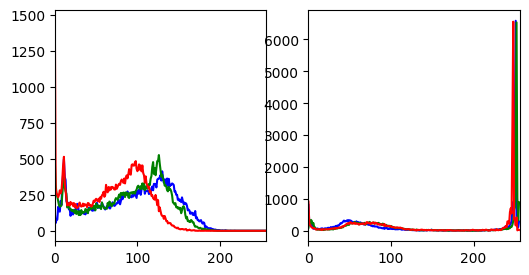

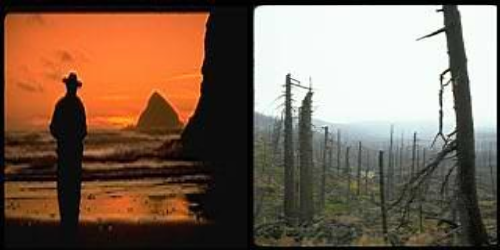

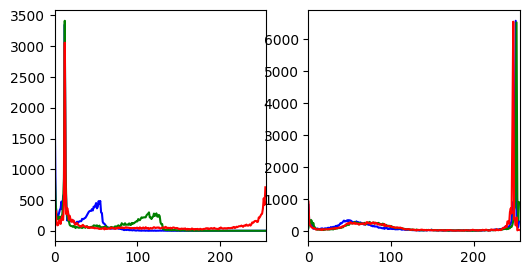

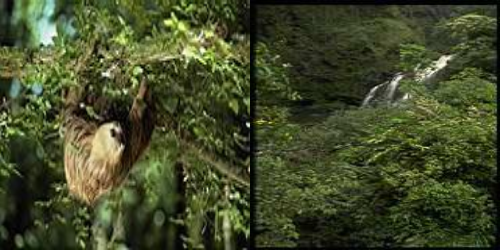

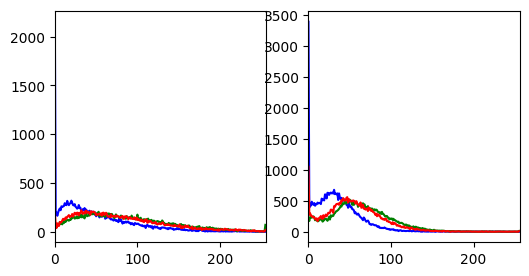

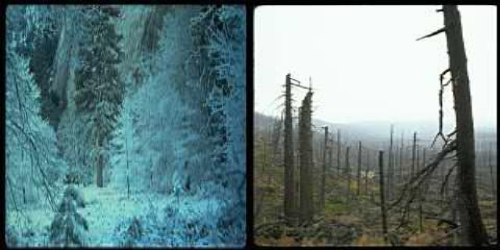

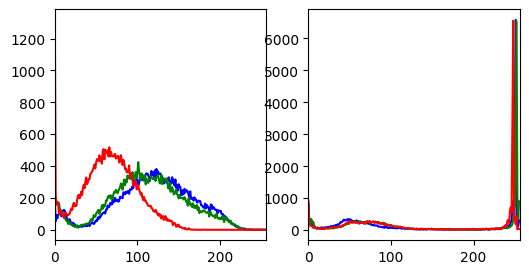

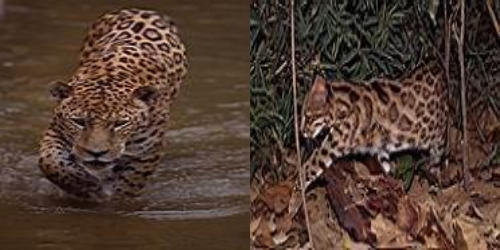

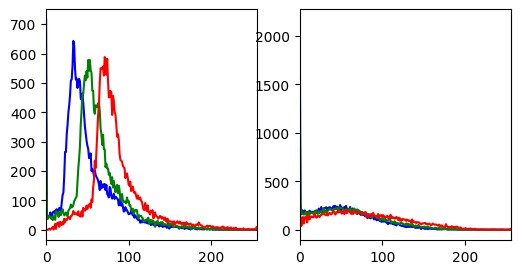

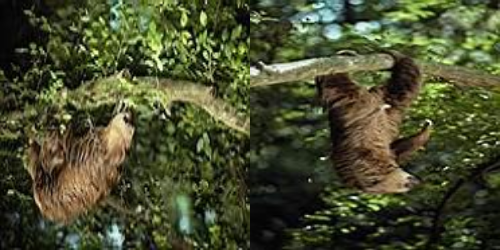

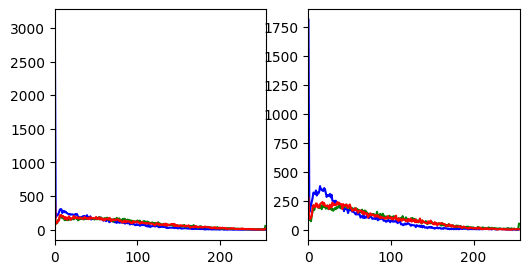

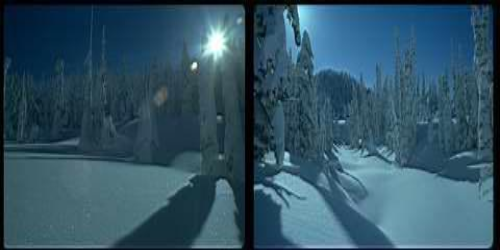

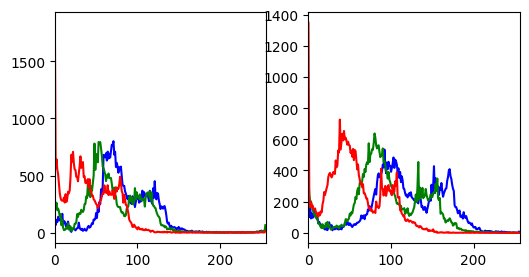

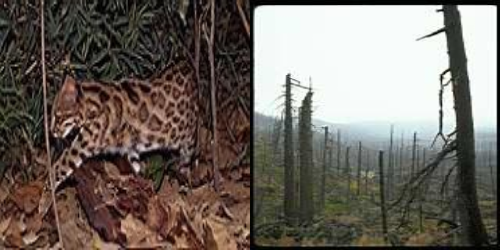

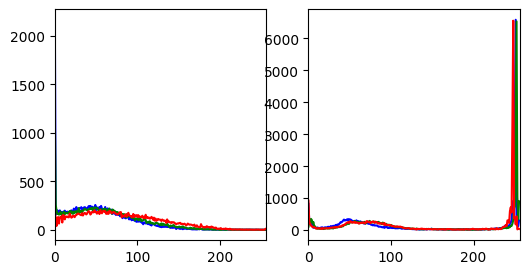

In [ ]:
# TESTING STRATEGIES

TEST_STRATEGIES = (
     [[[50, 50], 'HSV', 'Correlation'],
      [[50, 50, 50], 'LAB', 'Correlation'],
      [[25, 50, 75], 'BGR', 'Correlation'],
      [[25, 50, 75], 'BGR', 'Correlation'],
      [[25, 50], 'HSV', 'Correlation'],
      [[50, 50, 50], 'LAB', 'Correlation'],
      [[50, 50, 50], 'BGR', 'Chi-Square'],
      [[50, 50], 'HSV', 'Chi-Square'],
      [[50, 50, 50], 'LAB', 'Chi-Square']]
)


STRATEGIES = (
     [[[35, 55], 'HSV', 'Chi-Square']]
)

def print_histograms(top_pairs: List) -> NoReturn:
    for i, pair in enumerate(top_pairs):
        if i % 2 == 0:
            img1, img2 = pair[0], pair[1]
            print_collage([img1, img2], size=(250, 250))
            color = ('b','g','r')
            plt.figure(figsize=(6,3))
            plt.subplot(1,2,1)  
            for i, col in enumerate(color):
                histr1 = cv2.calcHist([img1], [i], None, [256], [0,256])
                plt.plot(histr1, color = col)
                plt.xlim([0, 256])
            plt.subplot(1,2,2)
            for i, col in enumerate(color):
                histr2 = cv2.calcHist([img2], [i], None, [256], [0,256])
                plt.plot(histr2, color = col)
                plt.xlim([0, 256])
            plt.show()
            

def get_stats(items: List, STRATEGIES: List, n=20) -> NoReturn:
    for strategy in STRATEGIES:
        statistics = []
        pairs = list(permutations(items, 2)) 

        for pair in pairs:
            score = Research(pair[0], pair[1], strategy[0], strategy[1], strategy[2]).main()
            statistics.append([abs(score), pair])
        statistics = sorted(statistics, key=lambda x: x[0])

        top_pairs = [statistics[i][1] for i in range(n * 2)]
        print_histograms(top_pairs)

get_stats(items_large, STRATEGIES)

В результате тестовых запусков оказалось, что:
*   изображения, переведенные в цветовое пространство HSV;
*   использование параметров [35, 55] в качестве размеров бинов гистограммы;
*   вычисление расстояния между гистограммами с помощью метрики $\chi^2$ – позволяет получить наиболее схожие гистограмы изображений. 

В случае анализа изображений в цветовом пространстве BGR для схожой задачи имеет смысл равномерно распределять бины.



**10. (10 баллов)** Посмотрите на изображения в папке *leaves*. Посчитайте дескрипторы Фурье для каждого листочка изображений. Выведите на экран 20 пар изображений с максимально похожими дескрипторами.

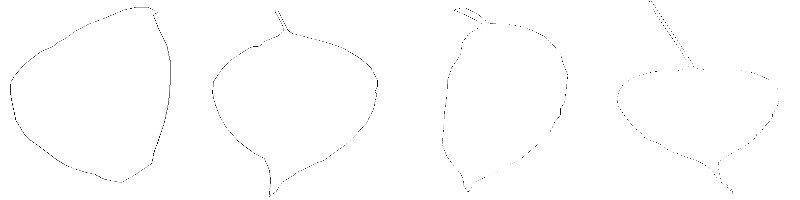

In [ ]:
# DATA LOADING
leaves_path = '/content/drive/MyDrive/Colab Notebooks/CV/hw2/datasets/leaves'

def data_leaves_gather(path: str) -> List[str]:
    items = []
    for dirpath, subdirs, files in os.walk(path):
        for name in files:
            item = os.path.join(dirpath, name)
            items.append(cv2.imread(item))
    return items

leaves = data_leaves_gather(leaves_path)
print_collage( [leaves[0], leaves[25], leaves[48], leaves[67] ]) 

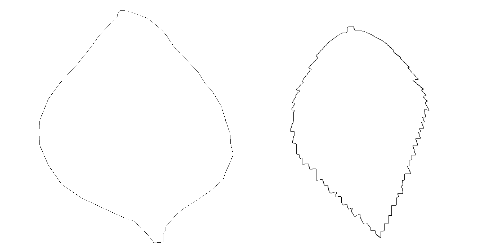

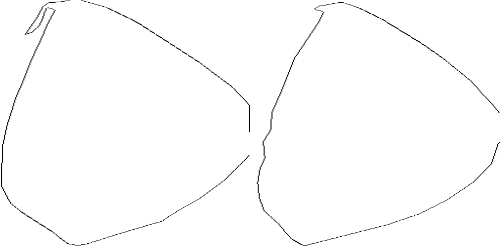

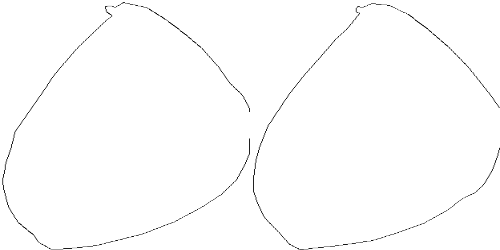

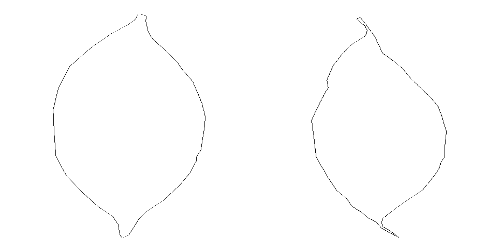

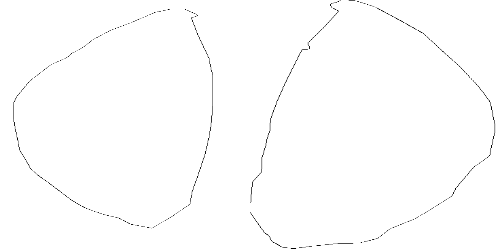

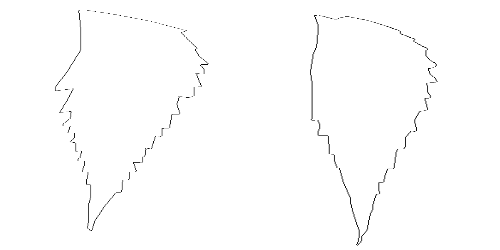

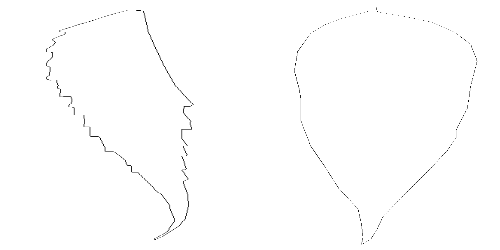

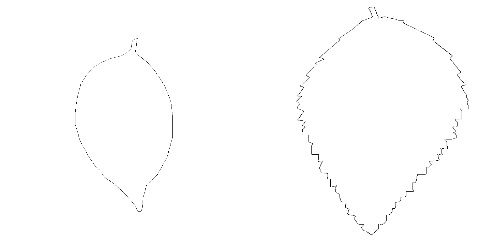

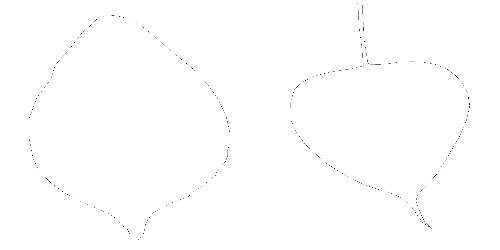

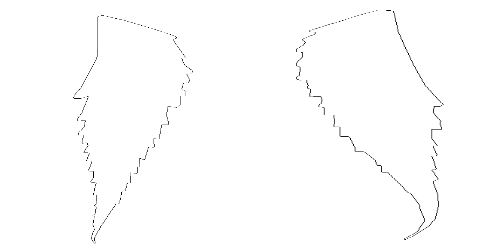

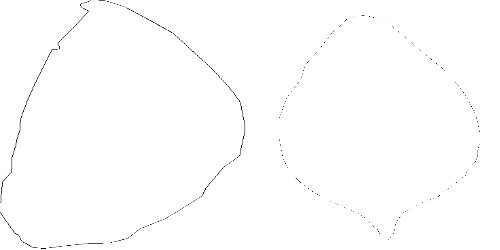

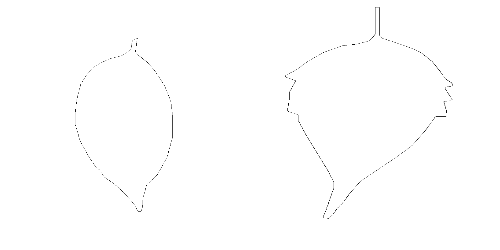

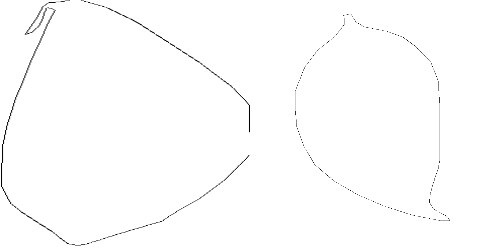

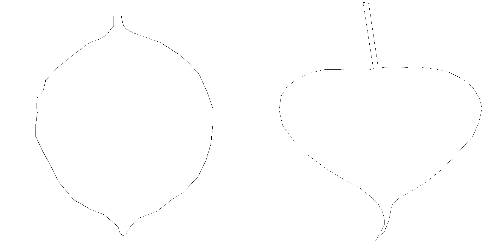

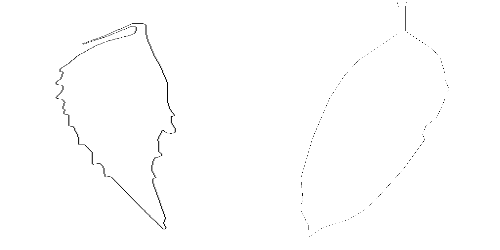

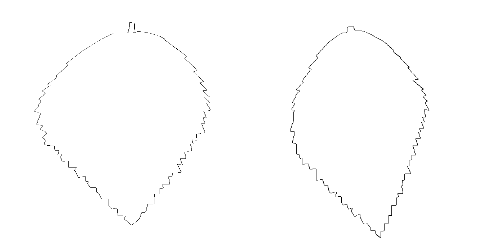

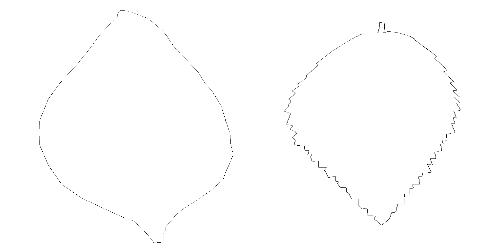

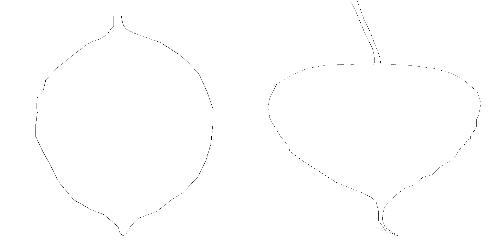

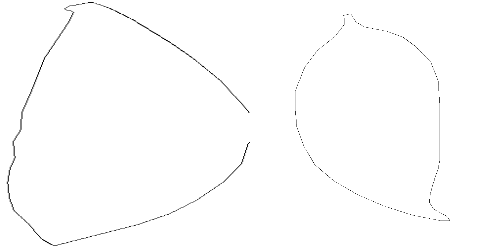

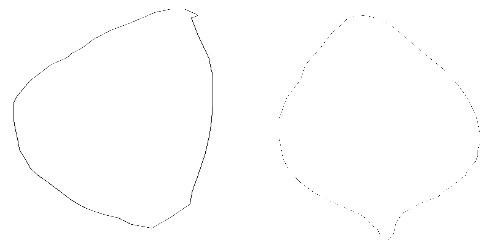

In [ ]:
def print_leaves(top_pairs: List) -> NoReturn:
    for i, pair in enumerate(top_pairs):
        if i % 2 == 0:
            img1, img2 = pair[0], pair[1]
            print_collage([img1, img2], size=(250, 250))

def FourierDescriptor(image: List) -> Tuple:
    imgray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    countour = np.vstack(np.where(imgray == 0)).transpose()
    countour -= np.mean(countour, axis=0).astype(int)
    return countour, np.linalg.norm(countour, axis=1)


def GetDistance(image: List) -> Tuple:
     countour, distance = FourierDescriptor(image)
     angles = np.arccos(countour[:, 1] / distance)
     mask_1 = countour[:, 0] < 0
     mask_2 = np.linspace(0, angles.shape[0] - 1, 50, dtype=int)
     angles[mask_1] = 2 * np.pi - angles[mask_1]
     indecies = np.argsort(angles)[mask_2]
     return distance, indecies

def GetScore(image: List) -> complex:
    distance, indecies = GetDistance(image)
    n = distance.shape[0]
    normalised = np.arange(n) / n
    complex_numbers = -2 * np.pi * complex(0, 1) * normalised
    score = [distance @ (np.exp(complex_numbers * i) / n) for i in range(n)]
    score = (np.absolute(np.array(score)) / score[0])[1]
    return score

def main(n=20) -> NoReturn:
    all_pairs = list(permutations(leaves, 2)) 
    all_indecies = list(permutations(np.arange(len(leaves)), 2)) 
    statistics = []
    scores = defaultdict()
    for i, pair in enumerate(all_indecies):

        if pair[0] in scores:
            score_1 = scores[pair[0]]
        else:
            score_1 = GetScore(all_pairs[i][0])
            scores[pair[0]] = score_1 

        if pair[1] in scores:
            score_2 = scores[pair[1]]
        else:
            score_2 = GetScore(all_pairs[i][1])
            scores[pair[1]] = score_2 

        statistics.append([((score_1 - score_2)**2).mean(), all_pairs[i]])

    statistics = sorted(statistics, key=lambda x: x[0])
    top_pairs = [statistics[i][1] for i in range(n * 2)]
    print_leaves(top_pairs)
    
main()